In [18]:
#Imports
import pandas as pd
from matplotlib import pyplot as plt

In [49]:
#Define and load data
train_data_url = 'titanic/train.csv'
test_data_url = 'titanic/test.csv'

train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)

In [39]:
### Explore Data
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [40]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [41]:
train_data.info()
#As we can see the features Age, Cabin and Embarked have some null values
#First guess is to fill age which the mean age
#Cabin will be dropped (i think) due to low amount of actual data
#Embarked barely contains null values therefore we will fill the missing values with the most common value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


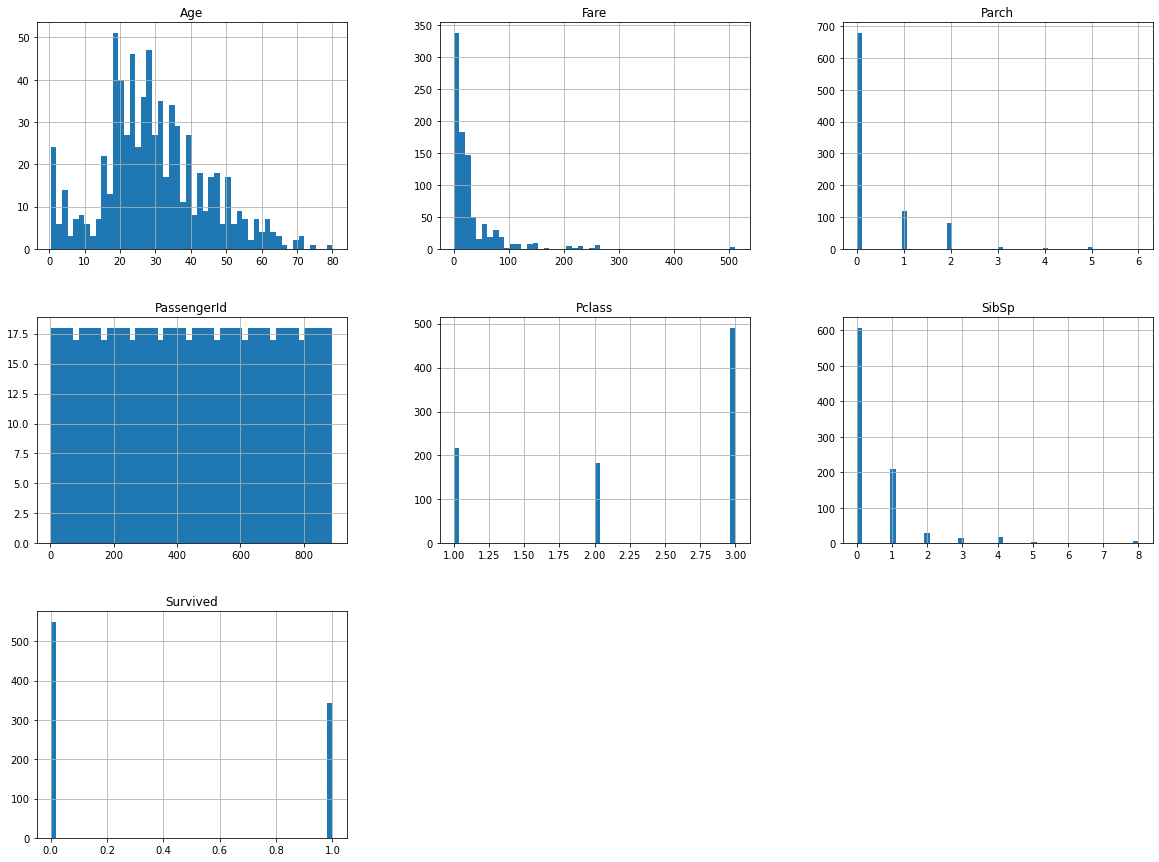

In [42]:
#Lets explore some more
%matplotlib inline
train_data.hist(bins=50, figsize=(20,15))
plt.show()
#first conclusion:
#most passengers traveled without their family (Parch && SibSp == 0)
#the age distribution looks normal
#most of the passengers are in the lower class (Pclass == 3)

In [43]:
#Does the gender have a impoact on the surival chance? - Yes! Females are more likely to survive 
print(train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [44]:
#Does the class have a impact on the survival chance? - Again Yes! So far we have 2 'good' features
print(train_data[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [45]:
#Embarked seems to have a impact, too. Maybe because the way passenger boarded had a influence? 
print(train_data[["Embarked","Survived"]].groupby(["Embarked"], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [46]:
#Does the amount of siblings aboard influnce your chances of surviving? 
#Maybe transforming the feature to 0=alone 1=not alone might be better 
print(train_data[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [47]:
#Parents / children aboard compared to survival rate
#Maybe transforming the feature to 0=alone 1=not alone might be better 
print(train_data[["Parch","Survived"]].groupby(["Parch"], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


### Conclusion after the first data exploration:
Important features: Sex, Pclass 
Features likely to drop: Fare, Ticket, Cabin 